In [ ]:
# !pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=e0aa771e835d47bc3e559af39cf8d2121d687f45c382374d7b1279f1f6fa8166
  Stored in directory: /tmp/pip-ephem-wheel-cache-gg12okbe/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [ ]:
# get train data

!gdown --id 1ezL7SU2JJDX8iflbeDiOfKpdN8-sf9Au

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ezL7SU2JJDX8iflbeDiOfKpdN8-sf9Au
To: /content/license_plate_detection.zip
100% 213M/213M [00:05<00:00, 37.7MB/s]


In [ ]:
# extract train

!unzip '/content/license_plate_detection.zip' -d '/content/images_train'

Archive:  /content/license_plate_detection.zip
  inflating: /content/images_train/annotations/Cars0.xml  
  inflating: /content/images_train/annotations/Cars1.xml  
  inflating: /content/images_train/annotations/Cars10.xml  
  inflating: /content/images_train/annotations/Cars100.xml  
  inflating: /content/images_train/annotations/Cars101.xml  
  inflating: /content/images_train/annotations/Cars102.xml  
  inflating: /content/images_train/annotations/Cars103.xml  
  inflating: /content/images_train/annotations/Cars104.xml  
  inflating: /content/images_train/annotations/Cars105.xml  
  inflating: /content/images_train/annotations/Cars106.xml  
  inflating: /content/images_train/annotations/Cars107.xml  
  inflating: /content/images_train/annotations/Cars108.xml  
  inflating: /content/images_train/annotations/Cars109.xml  
  inflating: /content/images_train/annotations/Cars11.xml  
  inflating: /content/images_train/annotations/Cars110.xml  
  inflating: /content/images_train/annotatio

In [ ]:
!cd /content

In [ ]:
!mkdir input

In [ ]:
!mkdir input/train

In [ ]:
!mkdir input/test

In [ ]:
!cd /content/input

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[5][0].text),
                     int(member[5][1].text),
                     int(member[5][2].text),
                     int(member[5][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
dataset = xml_to_csv('/content/images_train/annotations')

In [ ]:
dataset

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Cars31.png,400,245,licence,286,173,400,211
1,Cars244.png,400,300,licence,20,87,360,155
2,Cars351.png,400,225,licence,249,48,368,129
3,Cars136.png,400,267,licence,164,104,245,119
4,Cars34.png,400,332,licence,147,181,260,206
...,...,...,...,...,...,...,...,...
466,Cars267.png,415,220,licence,274,118,343,138
467,Cars265.png,400,218,licence,87,166,216,212
468,Cars315.png,400,300,licence,12,98,385,181
469,Cars173.png,400,226,licence,170,118,252,163


In [ ]:
# import pandas as pd

column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
dataset_csv = pd.DataFrame(dataset, columns=column_name)

dataset_csv.iloc[0]

filename    Cars31.png
width              400
height             245
class          licence
xmin               286
ymin               173
xmax               400
ymax               211
Name: 0, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset_csv, test_size=0.15, random_state=0, stratify=dataset_csv['class'])

In [ ]:
train['class'].value_counts()

licence    400
Name: class, dtype: int64

In [ ]:
test['class'].value_counts()

licence    71
Name: class, dtype: int64

In [ ]:
import shutil
import os
  
source = "/content/images_train/images/"
destination = "/content/input/test/"

for f in test['filename']:
      # full = f.split('/')[1]
      print('test/'+f)
      shutil.copy(source + f, destination + f)
      # print((source + f, destination + f))


destination = "/content/input/train/"
for f in train['filename']:
    print('train/'+f)
    shutil.copy(source + f, destination)


test/Cars83.png
test/Cars114.png
test/Cars37.png
test/Cars115.png
test/Cars294.png
test/Cars163.png
test/Cars430.png
test/Cars0.png
test/Cars122.png
test/Cars73.png
test/Cars186.png
test/Cars113.png
test/Cars143.png
test/Cars204.png
test/Cars282.png
test/Cars263.png
test/Cars69.png
test/Cars41.png
test/Cars386.png
test/Cars224.png
test/Cars194.png
test/Cars322.png
test/Cars56.png
test/Cars70.png
test/Cars237.png
test/Cars32.png
test/Cars274.png
test/Cars431.png
test/Cars149.png
test/Cars2.png
test/Cars250.png
test/Cars95.png
test/Cars86.png
test/Cars110.png
test/Cars71.png
test/Cars410.png
test/Cars305.png
test/Cars266.png
test/Cars353.png
test/Cars119.png
test/Cars9.png
test/Cars234.png
test/Cars310.png
test/Cars208.png
test/Cars196.png
test/Cars146.png
test/Cars45.png
test/Cars16.png
test/Cars138.png
test/Cars278.png
test/Cars246.png
test/Cars197.png
test/Cars424.png
test/Cars1.png
test/Cars384.png
test/Cars18.png
test/Cars337.png
test/Cars266.png
test/Cars249.png
test/Cars101.png
te

In [ ]:
train.to_csv('/content/input/train.csv', index=None)
test.to_csv('/content/input/test.csv', index=None)

In [ ]:
cd '/content'

/content


In [ ]:
cp '/content/images_train/create_tfrecords.py' '/content/input'

In [ ]:
cp '/content/images_train/exporter_main_v2.py' '/content/input'

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 70055, done.
remote: Total 70055 (delta 0), reused 0 (delta 0), pack-reused 70055
Receiving objects: 100% (70055/70055), 578.33 MiB | 13.63 MiB/s, done.
Resolving deltas: 100% (49427/49427), done.


In [ ]:
!mkdir 'output'

In [ ]:
cd /content/input

/content/input


In [ ]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [ ]:
!python create_tfrecords.py --csv_input=/content/input/train.csv  --output_path=/content/output/train.record --image_dir=/content/input/train

Successfully created the TFRecords: /content/output/train.record


In [ ]:
!python create_tfrecords.py --csv_input=/content/input/test.csv  --output_path=/content/output/test.record --image_dir=/content/input/test

Successfully created the TFRecords: /content/output/test.record


In [ ]:
!touch '/content/output/custom.pbtxt'
with open('/content/output/custom.pbtxt', 'a') as the_file:

    the_file.write('item\n')
    the_file.write('{\n')
    the_file.write('id :{}'.format(int(1)))
    the_file.write('\n')
    the_file.write("name :'{}'".format(str('licence')))
    the_file.write('\n')
    the_file.write('}\n')


In [ ]:
cd '/content'

/content


In [ ]:
cp '/content/models/research/object_detection/model_main_tf2.py' '/content/input'

In [ ]:
ls

images_train/  license_plate_detection.zip  output/
input/         models/                      sample_data/


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.1 MB 8.4 MB/s 
     |████████████████████████████████| 352 kB 41.8 MB/s 
     |████████████████████████████████| 2.2 MB 34.9 MB/s 
     |████████████████████████████████| 23.4 MB 65.9 MB/s 
     |████████████████████████████████| 636 kB 37.4 MB/s 
     |████████████████████████████████| 234 kB 48.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 4.9 MB 32.7 MB/s 
     |████████████████████████████████| 1.1 MB 37.3 MB/s 
     |████████████████████████████████| 99 kB 1

In [ ]:
!pip install requests==2.23.0

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
apache-beam 2.37.0 requires requests<3.0.0,>=2.24.0, but you have requests 2.23.0 which is incompatible.


In [ ]:
!pip install folium==0.2.1

     |████████████████████████████████| 69 kB 3.4 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=69502efb719fe7e98333e5f40fb43f76aaa8c9bd5c73c500e8bea2c4fdc80b49
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [ ]:
!pip install dill==0.3.4

     |████████████████████████████████| 86 kB 3.1 MB/s 
  Attempting uninstall: dill
    Found existing installation: dill 0.3.1.1
    Uninstalling dill-0.3.1.1:
      Successfully uninstalled dill-0.3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.37.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.37.0 requires requests<3.0.0,>=2.24.0, but you have requests 2.23.0 which is incompatible.


In [ ]:
!pip install opencv-python==4.5.4.58

     |████████████████████████████████| 60.3 MB 93 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install imgaug==0.2.6

     |████████████████████████████████| 631 kB 5.1 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=e0c5268f90375a00ad177f233a05947657dcc92cfb7e9b8f74c8aedd6e9f64c1
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-03-13 14:45:06.843491: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0313 14:45:08.045445 140019926247296 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 5.36s
I0313 14:45:08.937770 140019926247296 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 5.36s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.93s
I0313 14:45:10.868662 140019926247296 test

In [ ]:
mkdir /content/input/pre-trained-models

In [ ]:
cd /content/input/pre-trained-models

/content/input/pre-trained-models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-03-13 14:46:01--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.183.128, 2607:f8b0:4001:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.183.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.08s   

2022-03-13 14:46:01 (255 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C '/content/input/pre-trained-models'

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
cd /content/input

/content/input


In [ ]:
mkdir /content/input/model

In [ ]:
mkdir /content/input/model/ssd_mobilenet_v2_fpn

In [ ]:
cp '/content/images_train/pipeline.config' '/content/input/model/ssd_mobilenet_v2_fpn'

In [ ]:
ls

create_tfrecords.py  model_main_tf2.py    test/     train/
model/               pre-trained-models/  test.csv  train.csv


In [ ]:
cd /content/input

/content/input


In [ ]:
!python model_main_tf2.py --model_dir=/content/input/model/ssd_mobilenet_v2_fpn --pipeline_config_path=/content/input/model/ssd_mobilenet_v2_fpn/pipeline.config

2022-03-13 14:49:40.168486: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0313 14:49:40.174332 140254590842752 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0313 14:49:40.178692 140254590842752 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0313 14:49:40.178884 140254590842752 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0313 14:49:40.214182 140254590842752 deprecation.py:343] From /content/models/research/object_detection/model_lib_v2.py:564: StrategyBase.experimental_distribute_

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/input/model/ssd_mobilenet_v2_fpn/pipeline.config --trained_checkpoint_dir /content/input/model/ssd_mobilenet_v2_fpn --output_directory /content/output/exported-model

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0313 16:46:09.994063 140269210277760 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0313 16:46:33.001008 140269210277760 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f9260299790>, because it is not built.
W0313 16:46:33.349614 140269210277760 

In [ ]:
!zip -r /content/file.zip /content/output/exported-model

  adding: content/output/exported-model/ (stored 0%)
  adding: content/output/exported-model/pipeline.config (deflated 68%)
  adding: content/output/exported-model/checkpoint/ (stored 0%)
  adding: content/output/exported-model/checkpoint/checkpoint (deflated 41%)
  adding: content/output/exported-model/checkpoint/ckpt-0.index (deflated 80%)
  adding: content/output/exported-model/checkpoint/ckpt-0.data-00000-of-00001 (deflated 8%)
  adding: content/output/exported-model/saved_model/ (stored 0%)
  adding: content/output/exported-model/saved_model/variables/ (stored 0%)
  adding: content/output/exported-model/saved_model/variables/variables.index (deflated 78%)
  adding: content/output/exported-model/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/output/exported-model/saved_model/saved_model.pb (deflated 92%)
  adding: content/output/exported-model/saved_model/assets/ (stored 0%)


# **Testing the trained model** #

upload a test image to **/content** directory with name **test.jpg**

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
# import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/output/exported-model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/output/custom.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.20)

In [ ]:
# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Loading model...Done! Took 17.1720871925354 seconds


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
training_data = []
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """

    # image = cv2.imread(path)
    # image =  cv2.resize(image, (320, 320), interpolation = cv2.INTER_CUBIC)
  
    # training_data.append(np.asarray(image))


    # training_data = np.reshape(training_data,(-1,320,
    #           320,3))
    # training_data = training_data.astype(np.float32)
    # training_data = training_data / 127.5 - 1.
    # return training_data[0]
    return np.array(Image.open(path))

In [ ]:
IMAGE_PATHS = '/content/test.jpg'
print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()
print()
detections['detection_scores'][:5]

Running inference for /content/test.jpg... 


array([0.57407665, 0.07314042, 0.06413156, 0.05757536, 0.05602579],
      dtype=float32)

Done


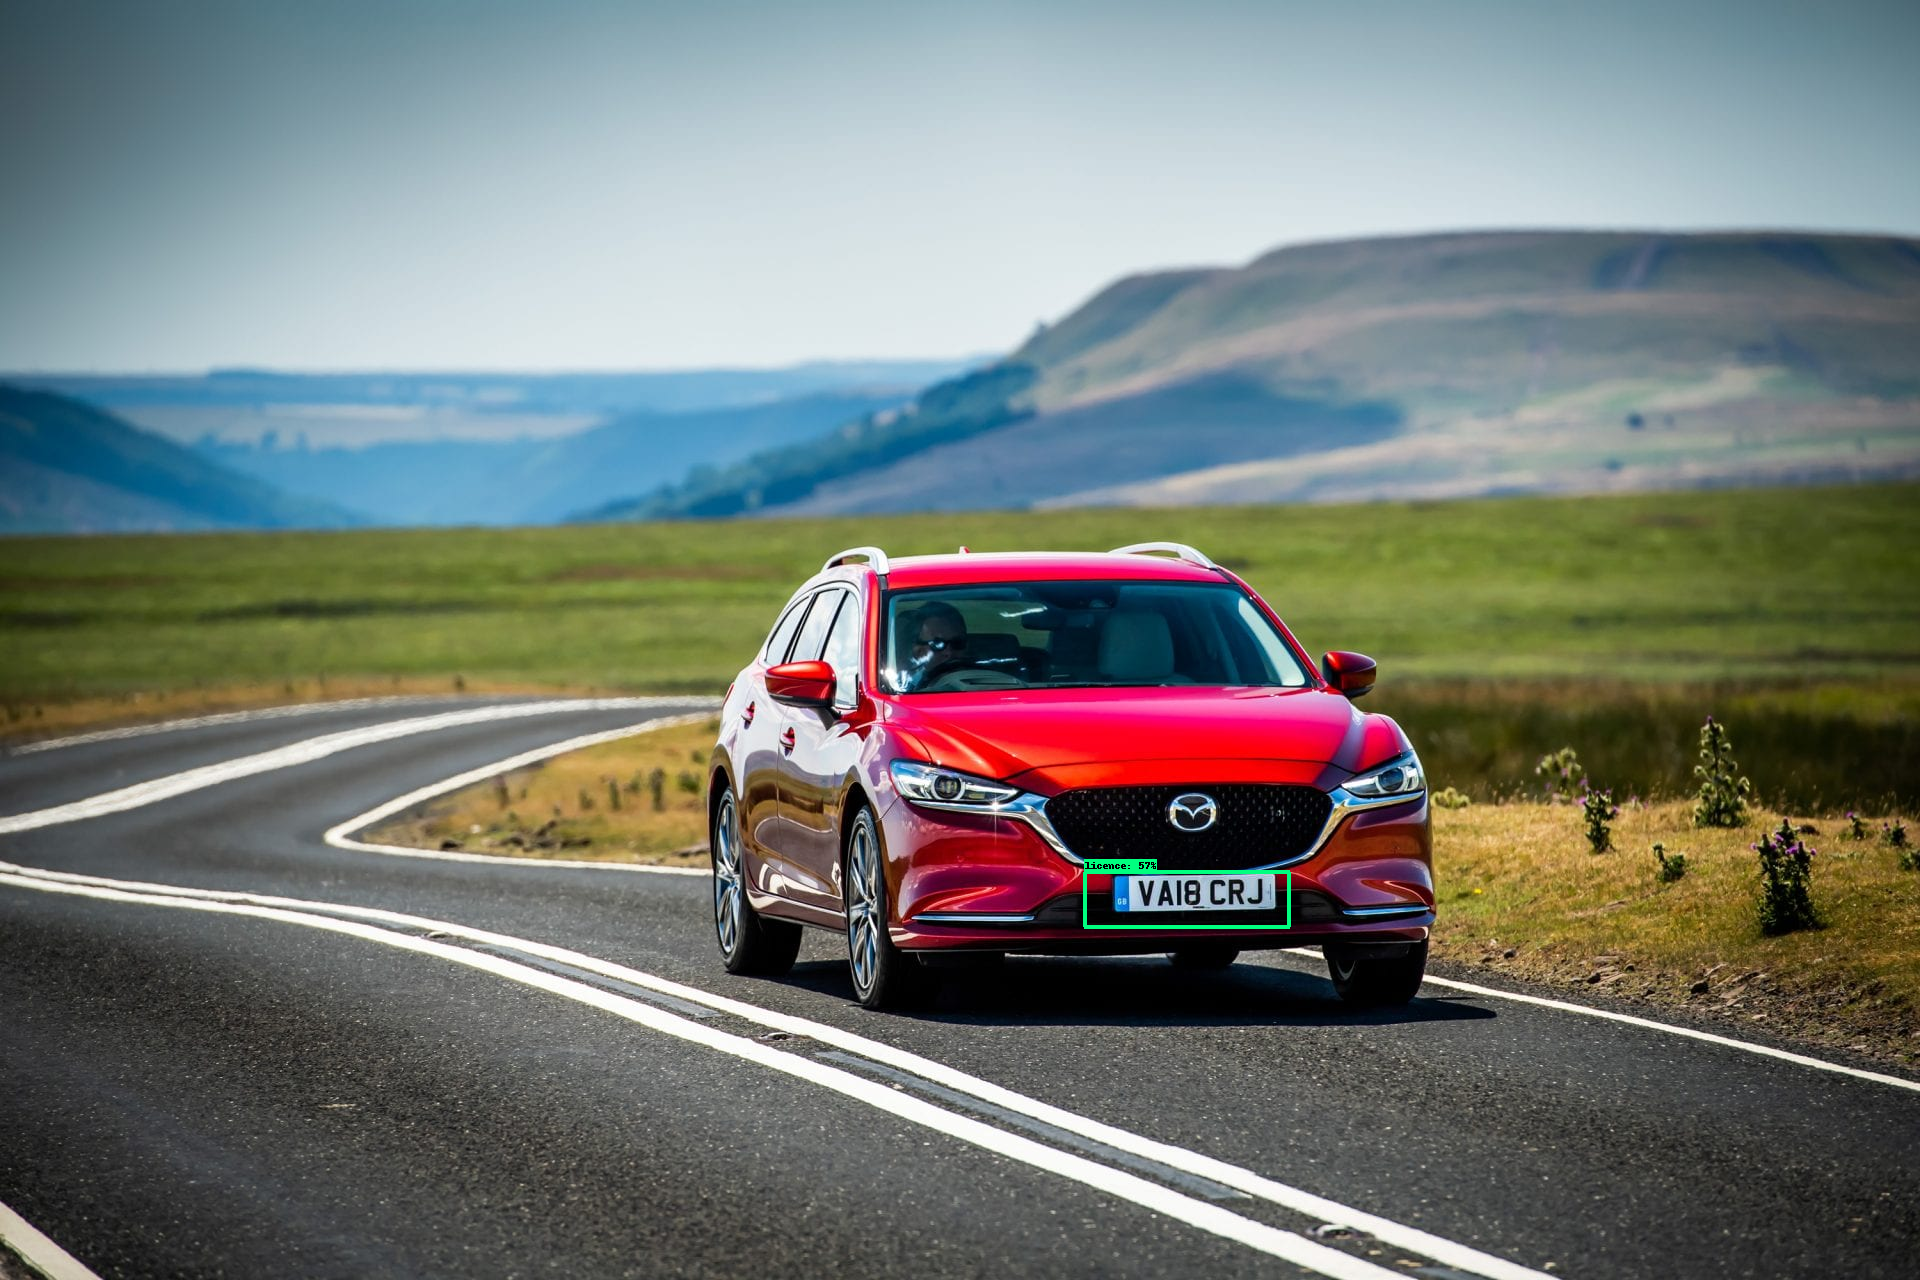

In [ ]:


# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=2,
      min_score_thresh=0.1,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED